# Исследование объявлений о продаже квартир
    
Исследование продаж интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности - это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Цель: исследуем продажи интернет-магазина, популярность жанров, определим наиболее прибыльные жанры и игровые платформы в разрезе рынков сбыта

## Импорт библиотек и обзор датасета:

### Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy import stats as st

warnings.filterwarnings('ignore')

### Импортируем датасет

In [2]:
data = pd.read_csv('games.csv', sep=',')

### Первичный обзор информации и графиков:

In [3]:
display(data.head(10))
print()
print(data.shape)
print()
data.info(memory_usage='deep')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


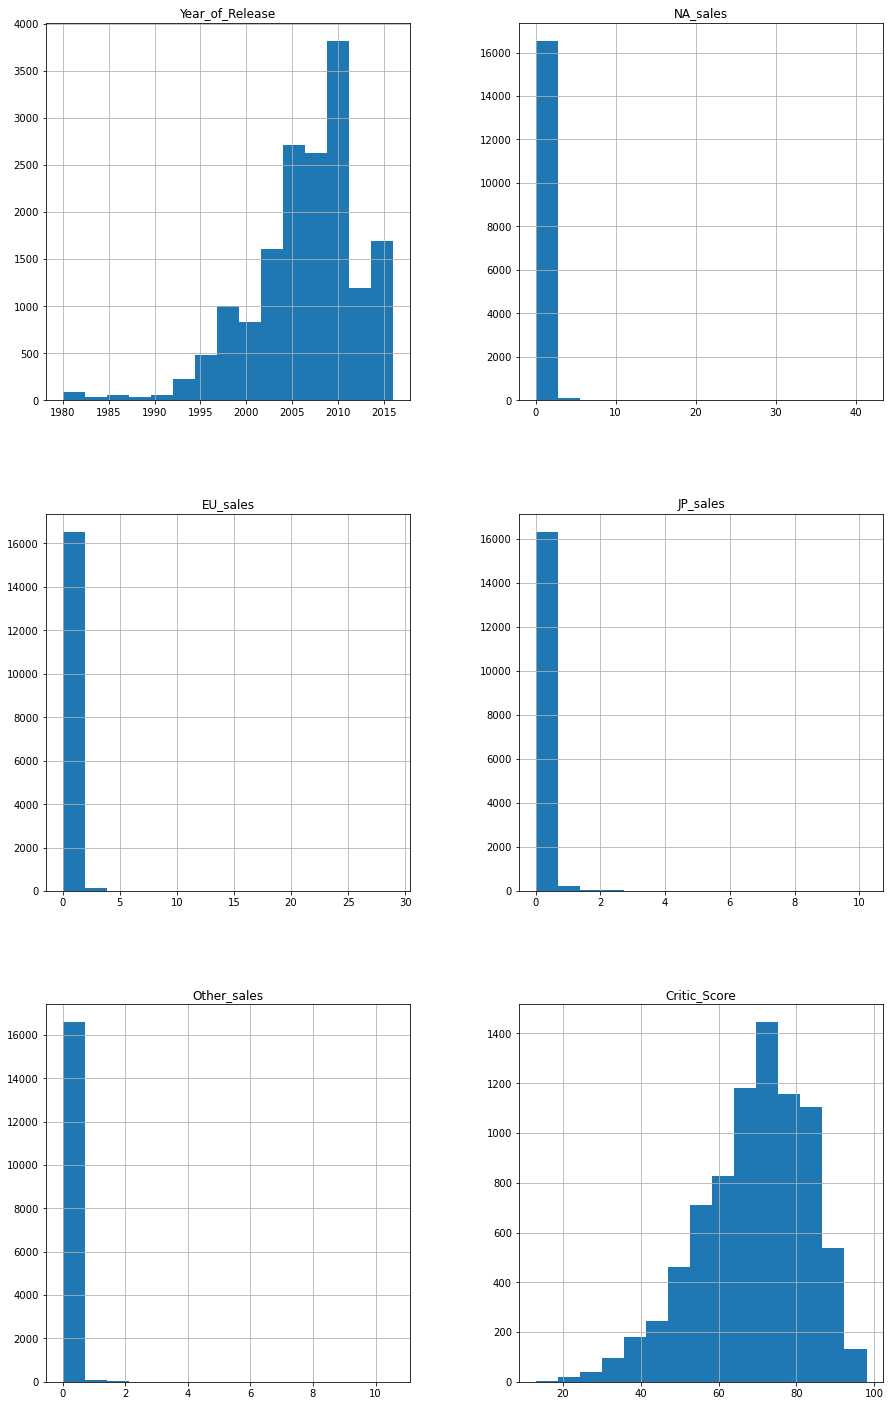

In [4]:
data.hist(bins=15, figsize=(15, 25));

**Вывод:**
* Датасет имеет размерность 16715*11
* Требуется привести наименования столбцов к стандартным (перевести в lower_case)
* Присутствуют пропуски в столбцах Name, Year_of_release, Genre, Critic_score, user_Score, Rating
* Есть потенциал для сокращения объема используемой оперативной памяти путем коррекции типов данных (Year_of_Release, User_Score, Rating
* Оценки критиков и год релиза имеют нормальное распределение

## Предобработка данных

### Оценка уникальных значений

In [5]:
for i in data.columns:
    try: #оборачиваем в try-except, т.к. есть пропуски
        print(f'Уникальные значениястолбца {i}: ', sorted(data[i].unique()))
        print()
    except: #
        print(f'Уникальные значениястолбца {i}: ', data[i].unique())

Уникальные значениястолбца Name:  ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значениястолбца Platform:  ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

Уникальные значениястолбца Year_of_Release:  [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]

Уникальные значениястолбца Genre:  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значениястолбца NA_sales:  [0.0, 0.01, 0.02, 

### Переименование столбцов

In [6]:
data.columns = data.columns.str.lower()
#data.columns

### Поиск и удаление явных дубликатов

In [7]:
for i in ['name', 'platform', 'genre', 'rating']:
    data[i] = data[i].str.lower()
data.duplicated().sum()

0

### Заполнение пропусков в данных

In [8]:
display(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Доля игр без даты релиза всего 1.61%, достаточно мало для удаления из датасета. Вероятно это старые игры.
Доля игр без имени всего 2 шт., достаточно мало для удаления из датасета.
Доля игр без жанра всего 2 шт., достаточно мало для удаления из датасета.

In [10]:
#print('Доля игр без даты релиза от генеральной совокупности: ', round(100*data['year_of_release'].isna().sum() / len(data), 2))
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

TBD - значит оценка отсутствует. Заменяю на nan, чтобы было возможно было работать со статистиками столбца

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Строк с пропусками оценок пользователей и критиков очень много, почти 50%. 

In [12]:
data['critic_score'] = data.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.median()))
data['user_score'] = data.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.median()))

Rating заполняем значением-заглушкой "no rated", иначе они выпадут из дальнейшей аналитики как NaN.
Два жанра обозачают одно и то же: К-А(старое) и Е(новое). заменим единым Е

In [13]:
data.loc[data['rating'] == 'k-a', 'rating'] = 'E'
data['rating'] = data['rating'].fillna('no rated')

In [14]:
display(data.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Корректировка типов данных

In [15]:
'''year_of_release. Экономим память на разрядах'''
data['year_of_release'] = data['year_of_release'].astype('int32')
#data['year_of_release'] = data['year_of_release'].astype('category')

'''Рейтинг меняю с object на category для экономии памяти'''
data['rating'] = data['rating'].astype('category')

'''Меняю разрядность где возможно'''
data['na_sales'] = data['na_sales'].astype('float32')
data['eu_sales'] = data['eu_sales'].astype('float32')
data['jp_sales'] = data['jp_sales'].astype('float32')
data['other_sales'] = data['other_sales'].astype('float32')
data['critic_score'] = data['critic_score'].astype('float32')
data['user_score'] = data['user_score'].astype('float32')

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  int32   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float32 
 5   eu_sales         16444 non-null  float32 
 6   jp_sales         16444 non-null  float32 
 7   other_sales      16444 non-null  float32 
 8   critic_score     16444 non-null  float32 
 9   user_score       16444 non-null  float32 
 10  rating           16444 non-null  category
dtypes: category(1), float32(6), int32(1), object(3)
memory usage: 3.7 MB


In [16]:
#Проверим предобработанный датасет на аномалии
(
    data[['na_sales', 'jp_sales', 'eu_sales', 'other_sales', 'critic_score', 'user_score']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,na_sales,jp_sales,eu_sales,other_sales,critic_score,user_score
count,"16,444.00","16,444.00","16,444.00","16,444.00","16,444.00","16,444.00"
min,0.00,0.00,0.00,0.00,13.00,0.00
max,41.36,10.22,28.96,10.57,98.00,9.70


### Добавим столбец с суммарными продажами по всем регионам

In [17]:
data.insert(8, 'total_sales', data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])

**Вывод:** Формат данных откорректирован, удалены не несущие смысла строки, сокращено число категорий, заполнены пропуски. Объем памяти сокртился на 37.5% - 3.5 вместо 5.6 Мб. Аномалии отсутствуют

## Исследовательский анализ данных

### Количество релизов игр по годам выпуска

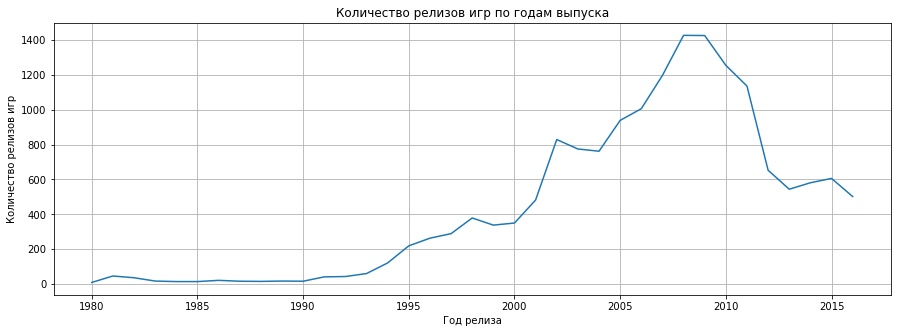

In [18]:
games_by_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

games_by_years.plot(figsize=(15, 5), grid=True, legend=False, \
                    ylabel='Количество релизов игр', xlabel='Год релиза', title='Количество релизов игр по годам выпуска')

games_by_years_2000 = data[data['year_of_release'].isin(range(1980, 2000))] \
                    .pivot_table(index='year_of_release', values='name', aggfunc='count').sum()

#print('Доля игр, выпущенных до 2000 года, %: ', 100 * games_by_years_2000 / data['name'].nunique())
#data['name'].nunique()

**Вывод:** Всего выпущено 11426 уникальных игр. За два десятилетия из 3.5  - с 1980 по 2020 год  - произошел релиз всего 17.3% игр. Для цели исследования данные нерелевантны. Для определения факторов успешности и их "прокачки" необходимо смотреть на более актуальные данные: с 2000 по 2016 годы (а лучше - еще меньший диапазон. С диапазоном мы определимся далее). Тем более за столько лет предпочтения пользователей (следовательно оценки), жанры могли значительно измениться

### Изменение объема продаж по разным платформам

,platform,total_sales
0,ps2,1233.559937
1,x360,961.239990
2,ps3,931.340027
3,wii,891.179993
4,ds,802.780029
5,ps,727.580017
6,ps4,314.139984
7,gba,312.880005
8,psp,289.529999
9,3ds,257.809998


Продажи на платформе ps2 продолжались с 2000 по 2011. Всего 11 лет
Продажи на платформе x360 продолжались с 2005 по 2016. Всего 11 лет
Продажи на платформе ps3 продолжались с 2006 по 2016. Всего 10 лет
Продажи на платформе wii продолжались с 2006 по 2016. Всего 10 лет
Продажи на платформе ds продолжались с 1985 по 2013. Всего 28 лет
Продажи на платформе ps продолжались с 1994 по 2003. Всего 9 лет
Продажи на платформе ps4 продолжались с 2013 по 2016. Всего 3 лет
Продажи на платформе gba продолжались с 2000 по 2007. Всего 7 лет
Продажи на платформе psp продолжались с 2004 по 2015. Всего 11 лет
Продажи на платформе 3ds продолжались с 2011 по 2016. Всего 5 лет


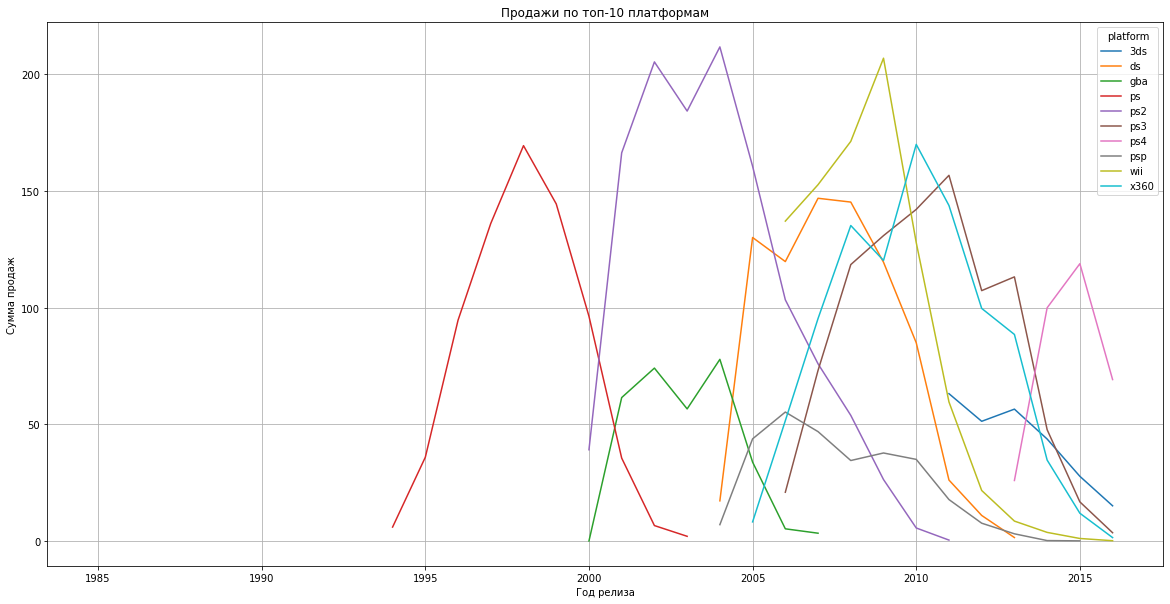

In [19]:
sales_by_platform = data \
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .reset_index() \
    .sort_values(by='total_sales', ascending=False).reset_index(drop=True) #список платформ по объему продаж по убыванию 
display(sales_by_platform)
top_platforms = list(sales_by_platform['platform'].head(10).unique()) #список топовых по продажам
#print(top_platforms)
top_platforms_years = data.query('platform in @top_platforms') \
    .pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')

top_platforms_years.plot(figsize=(20, 10), grid=True, legend=True,  \
                    ylabel='Сумма продаж', xlabel='Год релиза', title='Продажи по топ-10 платформам', \
                    )

#data['year_of_release'] = data['year_of_release'].astype('int32') #здесь потребовалось перевести в числовой формат
for i in top_platforms:
    min = data.loc[data['platform'] == i, 'year_of_release'].min()
    max = data.loc[data['platform'] == i, 'year_of_release'].max()
    range_sale = max - min
    print(f'Продажи на платформе {i} продолжались с {min} по {max}. Всего {range_sale} лет')

**Вывод:**
1. Платформы с максимальным за историю наблюдений объемом продаж по всем регионам: 'ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds'
2. На примере топовых по продажам платформ заметно, что платформа приносит прибыль примерно в течении примерно 10 с момента выхода (за исключением Nintendo DS - это рекордсмен-исключение с 28 годами -  и тех, продажи на которых еще продолжаются)
3. График продаж по каждой платформе имеет вид нормального распределения

### Срез данных, актуальных для прогнозирования на 2017 год

In [20]:
'''Судя по графикам пункта 3.2 платформы приносят деньги обычно не более 10 лет. Пик продаж - на 4-6 годах. 
Поэтому для прогнозирования имет смысл взять срез платформ с соответствующей дата выхода платформы.'''
platforms_first_release = data \
            .groupby('platform')['year_of_release'] \
            .min().reset_index() \
            .sort_values(by='year_of_release', ascending=False)
#display(platforms_first_release.head(10))

'''Отберем актуальные по рыночному циклу платформы для прогнозирования'''
platforms_first_release = platforms_first_release.query('year_of_release > 2006').reset_index(drop=True)
actual_platforms = [i for i in platforms_first_release['platform']] 
actual_platforms

'''В связи с тем, что данные на 2016 год еще не полные, а пик распродаж может прийтись как раз на конец года, отсечем 2016-й.
Пик продаж - на 4-6 годах. Предпочтения пользователей по жанрам и прочему могут меняться быстрее, чем раз в 10 лет.
Сократим до 3 лет'''
data_actual = data[data['platform'].isin(actual_platforms)]
data_actual = data_actual.query(' 2013 <year_of_release <= 2016')

In [21]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1184 non-null   object  
 1   platform         1184 non-null   object  
 2   year_of_release  1184 non-null   int32   
 3   genre            1184 non-null   object  
 4   na_sales         1184 non-null   float32 
 5   eu_sales         1184 non-null   float32 
 6   jp_sales         1184 non-null   float32 
 7   other_sales      1184 non-null   float32 
 8   total_sales      1184 non-null   float32 
 9   critic_score     1184 non-null   float32 
 10  user_score       1184 non-null   float32 
 11  rating           1184 non-null   category
dtypes: category(1), float32(7), int32(1), object(3)
memory usage: 75.5+ KB


**Вывод:** Для прогнозирования на 2017-й год из датасета сделан срез по платформам, которые еще могут приносить прибыль в 2017 году: `xone`, `ps4`, `wiiu`, `psv`, `3ds`. Новый датасет `actual_platforms` содержит всего 788 записей.

### Сравнение продаж актуальных в 2016-м году платформ

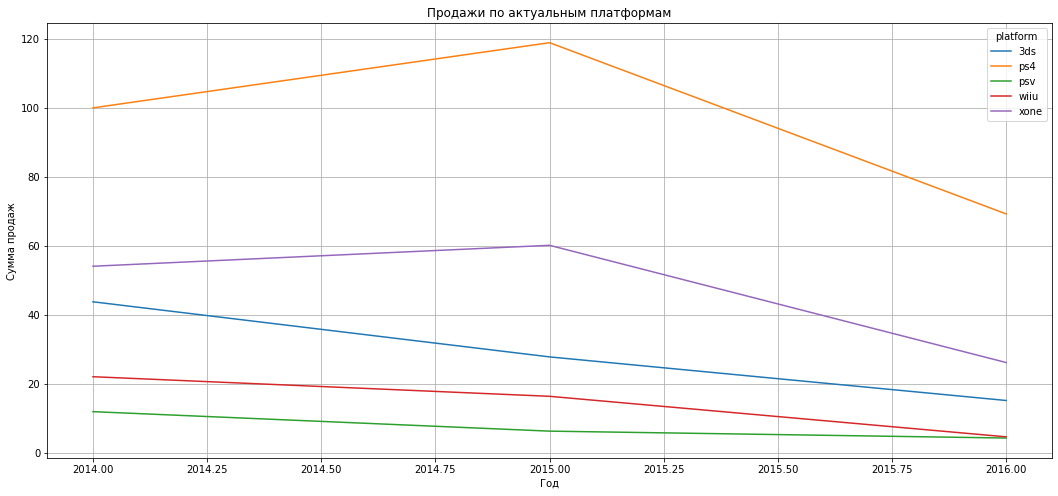

In [22]:
actual_sales = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='platform', 
                                        values='total_sales', 
                                        aggfunc='sum')
                                      

actual_sales.plot(
                    figsize=(18, 8), grid=True, legend=True,
                    ylabel='Сумма продаж', xlabel='Год', 
                    title='Продажи по актуальным платформам');

**Вывод:** 
1. На основании полных данных за 2015-й год заметны яркие лидер продаж: `ps4`, `xone`. Их продажи занимают большую часть рынка, и судя по циклу продаж платформ (около 10 лет) именно сейчас они находятся вблизи своего пика по сборам. При планировании рекламных кампаний необходимо делать упор на данные платформы. Возможно попробовать еще `3ds`.
2. Продажи остальных платформ падают последние 5 лет и приближаются к нулю.

### Обзор актуальных в 2016-м году платформ

In [23]:
def review(df, col, platform): 
    '''Функция для обзора данных методом boxplot.
    В качестве аргументов принимает df=датафрейм, col=столбец для обзора, platform=наименование платформы'''
    
    desc = df[col].describe()
    #df.boxplot(column=col, vert = False, figsize=(15,4)).set_title(f'Диаграмма размаха мировых продаж {platform}')
    #plt.ylim(0, 2)
    #plt.xlim(0,desc[6]*3)
    #plt.show()
    #print(desc)
    print(f'Медиана {platform}:', round(df[col].median(), 2))
    print(f'50% наблдюдений (межквартильный размах) платформы {platform} находятся в диапазоне между значениями \
{round(desc[4], 2)} и {round(desc[6], 2)}')
    #m = desc[3]
    poltora_q1 = desc[4] - 1.5*(desc[6] - desc[4])
    if poltora_q1 < 0:
        print(f'Нормальный диапазон значений платформы {platform}: \
c {round(desc[3], 3)} до {round(desc[6] + 1.5*(desc[6] - desc[4]), 3)}' )
    else:
        print(f'Нормальный диапазон значений {platform}: \
c {round(desc[4] - 1.5*(desc[6] - desc[4]), 3)} до {round(desc[6] + 1.5*(desc[6] - desc[4]), 3)}' )

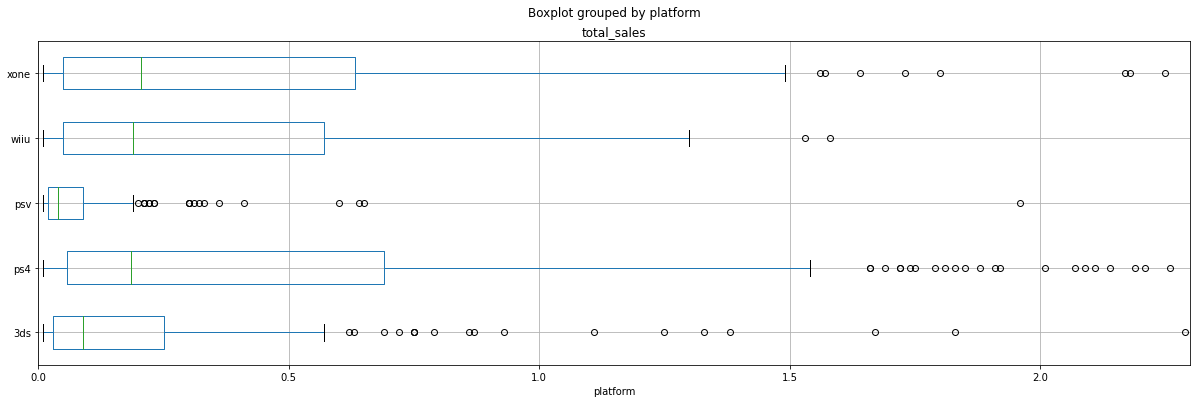

In [24]:
data_actual.boxplot('total_sales', by='platform', vert = False, figsize=(20, 6))
plt.xlim(0,2.3);

In [25]:
for j in actual_platforms:
    review(data_actual.query('platform == @j'), 'total_sales', j)
    print()

Медиана xone: 0.2
50% наблдюдений (межквартильный размах) платформы xone находятся в диапазоне между значениями 0.05 и 0.63
Нормальный диапазон значений платформы xone: c 0.01 до 1.506

Медиана ps4: 0.19
50% наблдюдений (межквартильный размах) платформы ps4 находятся в диапазоне между значениями 0.06 и 0.69
Нормальный диапазон значений платформы ps4: c 0.01 до 1.639

Медиана wiiu: 0.19
50% наблдюдений (межквартильный размах) платформы wiiu находятся в диапазоне между значениями 0.05 и 0.57
Нормальный диапазон значений платформы wiiu: c 0.01 до 1.35

Медиана psv: 0.04
50% наблдюдений (межквартильный размах) платформы psv находятся в диапазоне между значениями 0.02 и 0.09
Нормальный диапазон значений платформы psv: c 0.01 до 0.195

Медиана 3ds: 0.09
50% наблдюдений (межквартильный размах) платформы 3ds находятся в диапазоне между значениями 0.03 и 0.25
Нормальный диапазон значений платформы 3ds: c 0.01 до 0.58



**Вывод:**
1. Лидирующие по продажам платформы `ps4` и `xone` имеют схожие характеристики мировых продаж игр: медианы (=0.2), размаха, нормального диапазона значений. Платформы популярные, с дорогими играми.
2. Ближайшая к ним по общему числу продаж `wiiu` имеет такую же, как и лидеры продаж, медиану при значительно меньших объемах продаж. Для нее выходит меньше игр, но они чаще приносят хороший средний чек.
3. `3ds` при больших, нежели `wiiu`, объемах продаж имеет низкую медиану - 0.09. Нет смысла делать упор на этом жанре.

### Взаимосвязь отзывов с продажами игр на платформе `ps4`

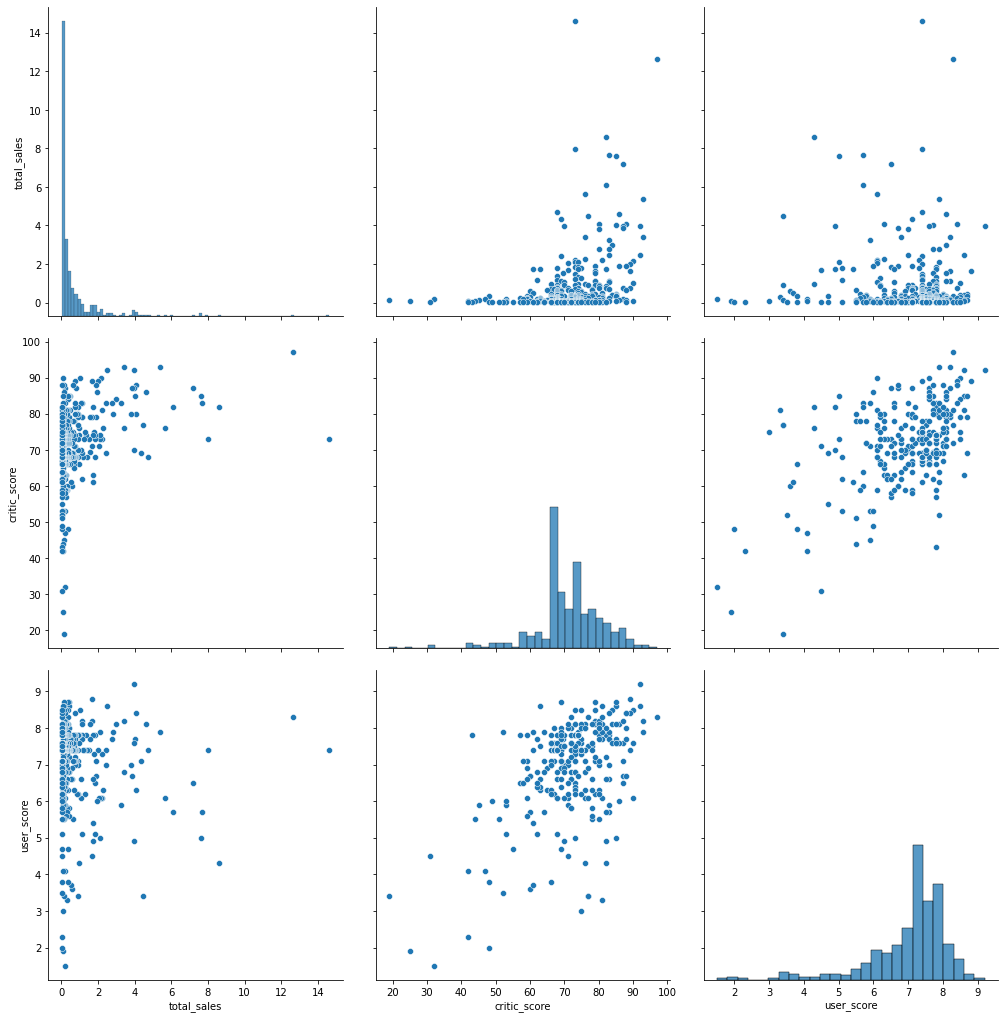

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.214338,-0.037367,0.042756
na_sales,-0.219443,1.000000,0.784902,0.491452,0.944903,0.928090,0.334742,-0.046222
eu_sales,-0.195176,0.784902,1.000000,0.472101,0.944380,0.958109,0.313541,-0.090846
jp_sales,-0.040969,0.491452,0.472101,1.000000,0.510433,0.538524,0.295995,0.165190
other_sales,-0.219129,0.944903,0.944380,0.510433,1.000000,0.998252,0.343889,-0.071657
total_sales,-0.214338,0.928090,0.958109,0.538524,0.998252,1.000000,0.346164,-0.067095
critic_score,-0.037367,0.334742,0.313541,0.295995,0.343889,0.346164,1.000000,0.475847
user_score,0.042756,-0.046222,-0.090846,0.165190,-0.071657,-0.067095,0.475847,1.000000


In [26]:
data_ps4_only = data_actual.query('platform == "ps4"')
sns.pairplot(data_ps4_only[['total_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(15,15);
plt.show()
data_ps4_only.corr()

**Вывод** 
1. Влияние отзывов критиков на продажи:
    * Коэффициент корреляции Пирсона: 0.35. Коэффициент положительный, что говорит о положительном влиянии отзывов критиков об игре на ее продажи. Однако его значение не так велико - либо влияние не сильное, либо взаимосвязь нелинейная. 70-75 наиболее частые оценки.
    * По графику рассеяния заметно: влияние отзывов критиков на продажи значительно вырастает при оценке > 60. Все игры, умеющие успех в реализации, имеют рейтинг критиков >70. Однако далеко не каждая игра с высоким рейтингом имеют отличные продажи - пользователи вероятно больше обращают внимание на другие факторы (личный опыт и предпочтения, обзоры, статьи и др.)
    * Самые успешные по продажам игры всегда коррелируют с отзывами критиков. Имеет смысл вкладывать деньги в покупку таких оценок
2. Влияние отзывов пользователей на продажи:
    * Коэффициент корреляции Пирсона: -0.06. Линейной зависимости между этими параметрами нет. 7-8 наиболее частые оценки
    * Отсутствие корреляции подтверждается и графиком рассеяния: высокие сборы могут быть при низких оценках, а могут и при высоких. Низкие сборы могут быть также как при высоких, так и при низких оценках
    * Вкладывать рекламные деньги в отзывы клиентов явно не стоит

### Проверим полученные выводы с другими платформами

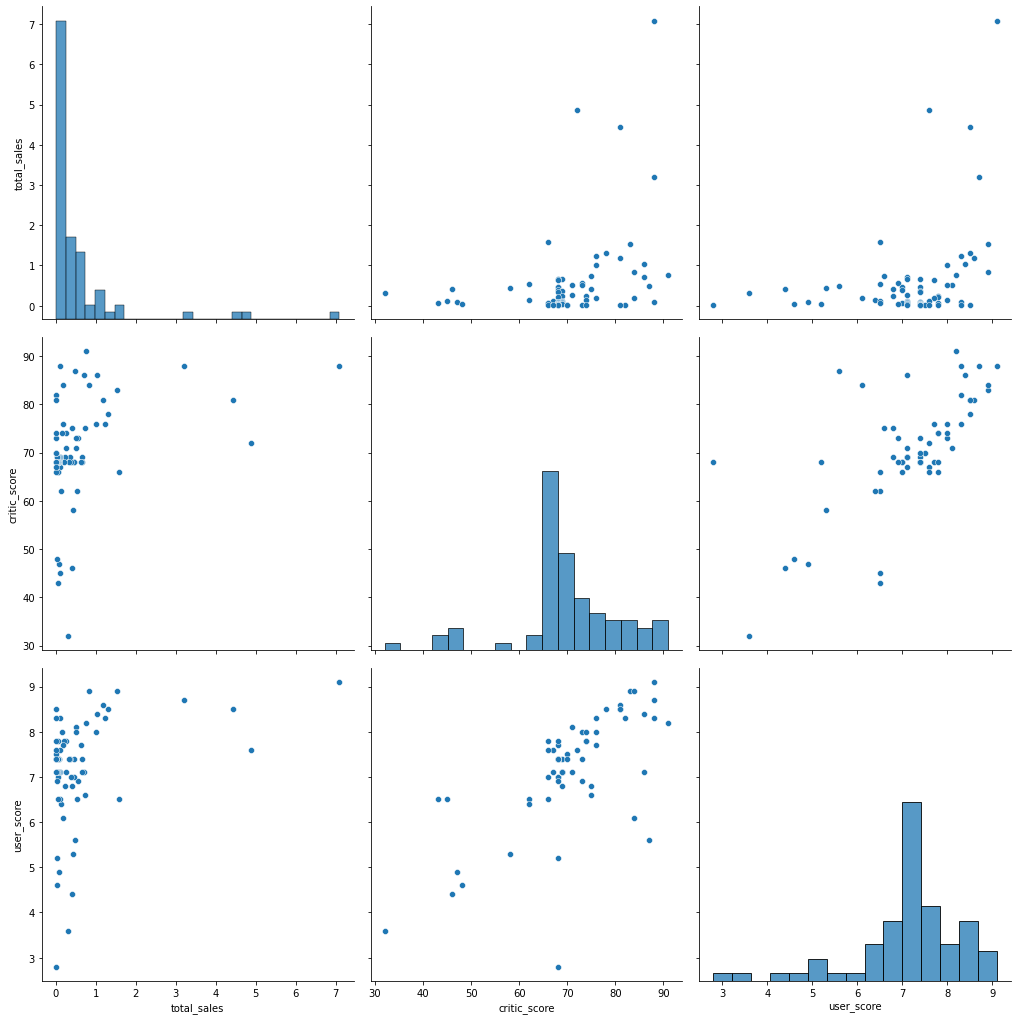

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.137767,-0.118623,-0.057475,-0.132400,-0.117538,0.045907,0.006162
na_sales,-0.137767,1.000000,0.967184,0.865752,0.997466,0.986836,0.332005,0.319274
eu_sales,-0.118623,0.967184,1.000000,0.893369,0.980793,0.986471,0.376001,0.351954
jp_sales,-0.057475,0.865752,0.893369,1.000000,0.878113,0.927670,0.309174,0.321072
other_sales,-0.132400,0.997466,0.980793,0.878113,1.000000,0.992516,0.346129,0.332613
total_sales,-0.117538,0.986836,0.986471,0.927670,0.992516,1.000000,0.349118,0.338342
critic_score,0.045907,0.332005,0.376001,0.309174,0.346129,0.349118,1.000000,0.666614
user_score,0.006162,0.319274,0.351954,0.321072,0.332613,0.338342,0.666614,1.000000


In [27]:
data_wiiu_only = data_actual.query('platform == "wiiu"')
sns.pairplot(data_wiiu_only[['total_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(15,15);
plt.show()
data_wiiu_only.corr()

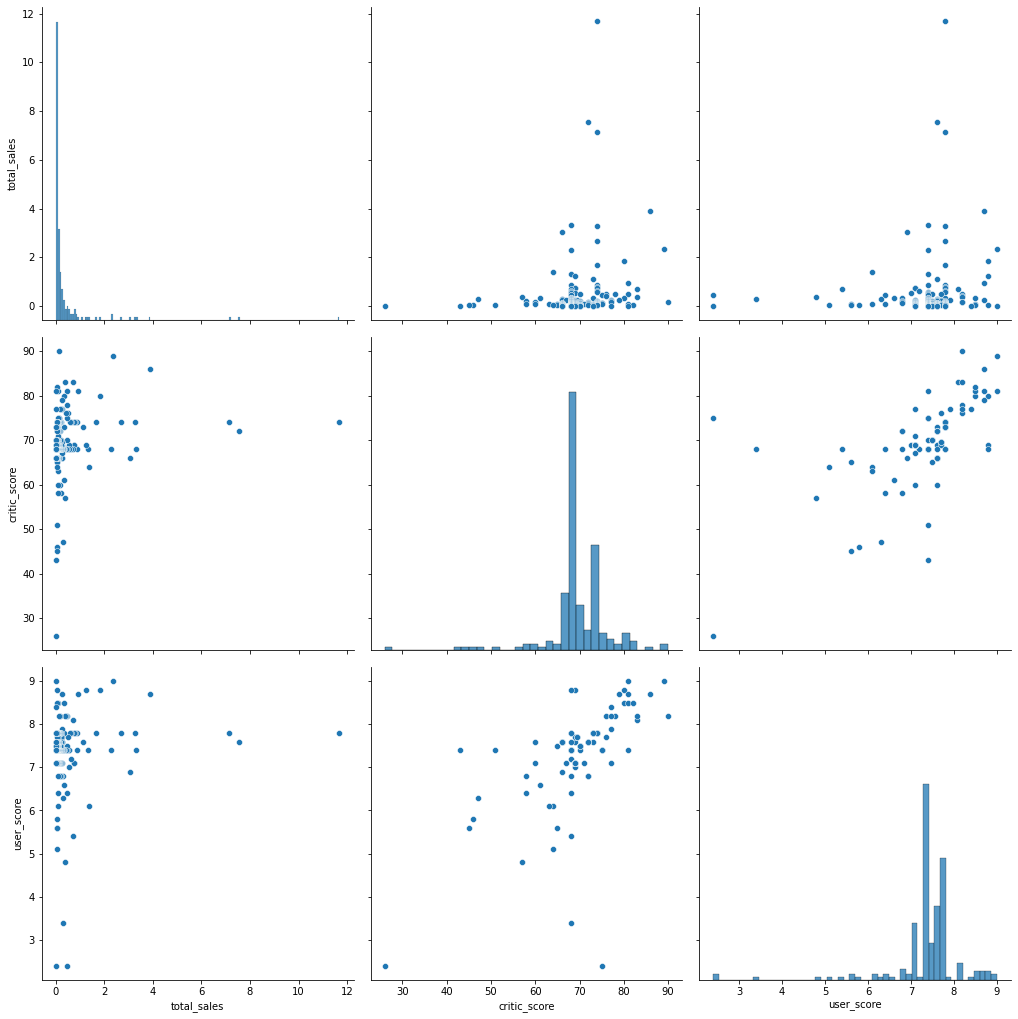

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.064862,-0.080950,-0.065903,-0.069488,-0.077659,0.060296,0.091980
na_sales,-0.064862,1.000000,0.926126,0.598757,0.995141,0.926824,0.151206,0.084302
eu_sales,-0.080950,0.926126,1.000000,0.570443,0.957303,0.902940,0.109809,0.016253
jp_sales,-0.065903,0.598757,0.570443,1.000000,0.600666,0.844990,0.174804,0.129412
other_sales,-0.069488,0.995141,0.957303,0.600666,1.000000,0.933912,0.143971,0.072681
total_sales,-0.077659,0.926824,0.902940,0.844990,0.933912,1.000000,0.169785,0.097266
critic_score,0.060296,0.151206,0.109809,0.174804,0.143971,0.169785,1.000000,0.592969
user_score,0.091980,0.084302,0.016253,0.129412,0.072681,0.097266,0.592969,1.000000


In [28]:
data_3ds_only = data_actual.query('platform == "3ds"')
sns.pairplot(data_3ds_only[['total_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(15,15);
plt.show()
data_3ds_only.corr()

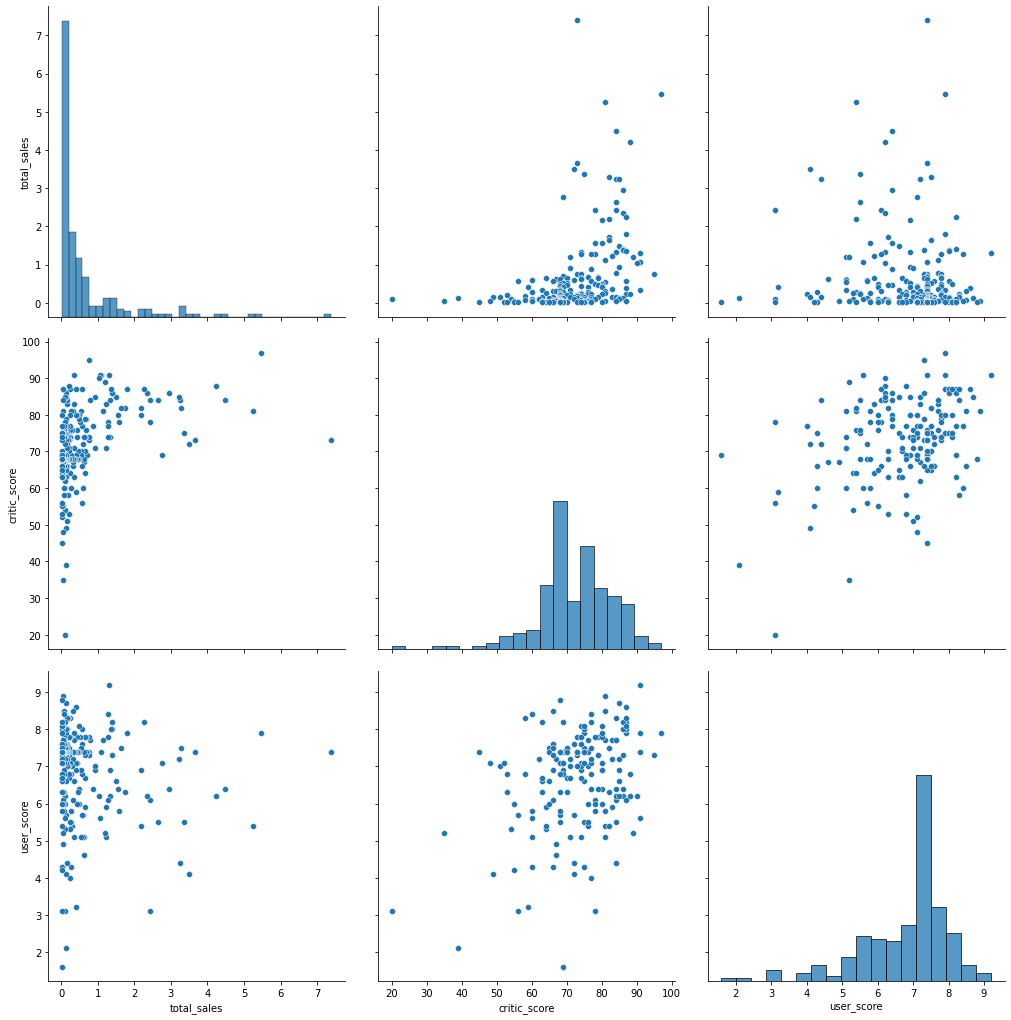

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.225464,-0.204378,-0.173475,-0.231761,-0.231327,0.007090,-0.042819
na_sales,-0.225464,1.000000,0.763032,0.435269,0.987812,0.969688,0.370716,-0.094913
eu_sales,-0.204378,0.763032,1.000000,0.424716,0.852089,0.897802,0.373246,-0.091023
jp_sales,-0.173475,0.435269,0.424716,1.000000,0.450555,0.460953,0.215131,0.035773
other_sales,-0.231761,0.987812,0.852089,0.450555,1.000000,0.995134,0.390820,-0.096753
total_sales,-0.231327,0.969688,0.897802,0.460953,0.995134,1.000000,0.394111,-0.098530
critic_score,0.007090,0.370716,0.373246,0.215131,0.390820,0.394111,1.000000,0.307849
user_score,-0.042819,-0.094913,-0.091023,0.035773,-0.096753,-0.098530,0.307849,1.000000


In [29]:
data_xone_only = data_actual.query('platform == "xone"')
sns.pairplot(data_xone_only[['total_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(15,15);
plt.show()
data_xone_only.corr()

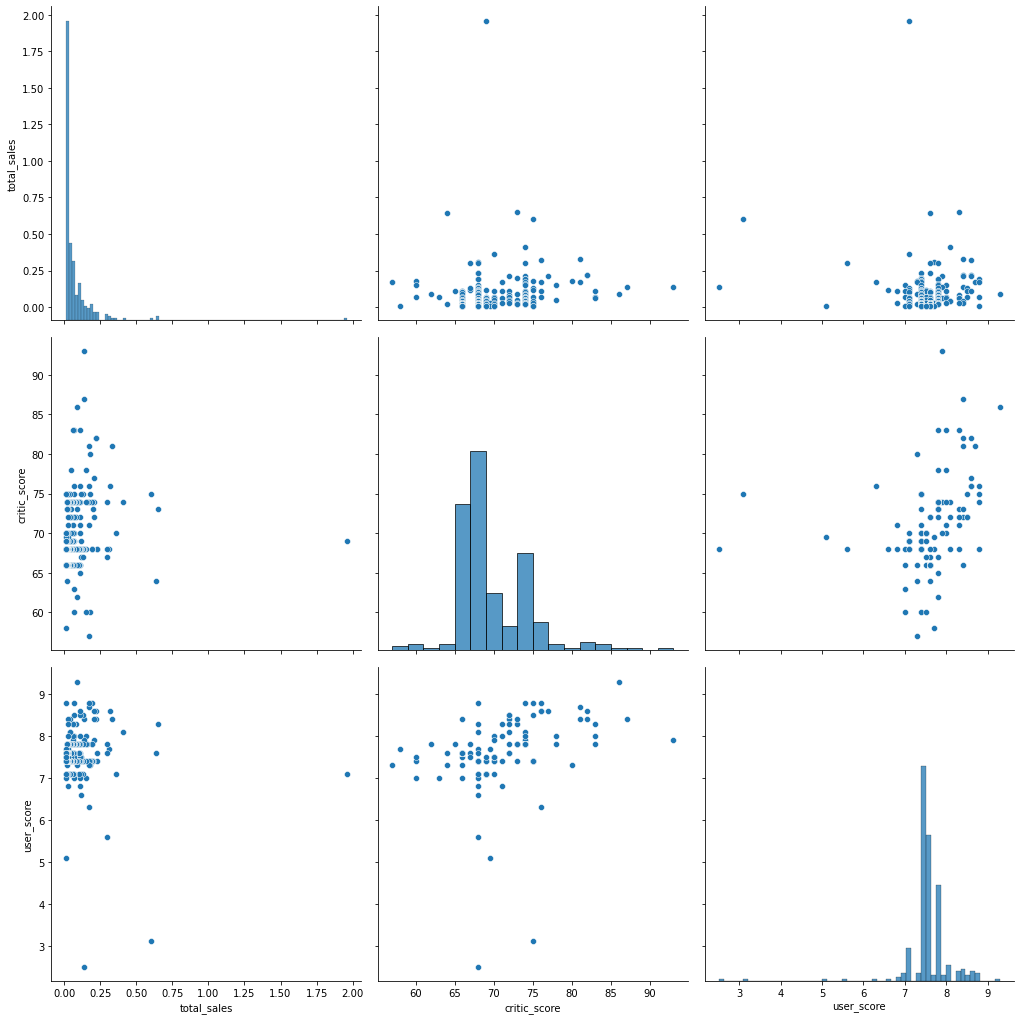

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.263120,-0.166131,-0.105909,-0.229166,-0.197583,-0.053722,0.020522
na_sales,-0.263120,1.000000,0.604556,0.310780,0.849204,0.690429,0.067163,-0.024044
eu_sales,-0.166131,0.604556,1.000000,0.517993,0.929260,0.868979,0.106428,-0.269541
jp_sales,-0.105909,0.310780,0.517993,1.000000,0.483387,0.833755,0.179325,0.094233
other_sales,-0.229166,0.849204,0.929260,0.483387,1.000000,0.884832,0.097424,-0.180458
total_sales,-0.197583,0.690429,0.868979,0.833755,0.884832,1.000000,0.157970,-0.074114
critic_score,-0.053722,0.067163,0.106428,0.179325,0.097424,0.157970,1.000000,0.305274
user_score,0.020522,-0.024044,-0.269541,0.094233,-0.180458,-0.074114,0.305274,1.000000


In [30]:
data_psv_only = data_actual.query('platform == "psv"')
sns.pairplot(data_psv_only[['total_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(15,15);
plt.show()
data_psv_only.corr()

**Выводы:**
1. Влияние отзывов критиков на продажи на актуальных в 2016г платформах:
    * Коэффициент корреляции Пирсона для более "продающих" платформ - `xone`, `ps4`, `wiiu` примерно одинаковые и лежат в районе 0.35 - 0.40. Отзывы критиков для них имеют гораздо большее значение, чем для прочих платформ.
    * Для платформ `3ds` и `psv` коэффициент корреляции Пирсона незначительный: 0.15 / 0.17. Платформы доживают свой жизненный цикл и отзывы критиков мало стимулируют новые продажи. 

2. Влияние отзывов пользователей на продажи на прочих платформах:
    * Коэффициент корреляции Пирсона для всех платформ, за исключением `wii` незначителен и колеблется в районе нулевого значения.

### Оценка количества продаж по жанрам

In [31]:
actual_sales_genres = data_actual.pivot_table(
                                        index='genre', 
                                        values='total_sales', 
                                        aggfunc=['sum', 'count'])
actual_sales_genres.columns = actual_sales_genres.columns.droplevel(level=1)

In [32]:
actual_sales_genres.sort_values(by='sum')
actual_sales_genres

,sum,count
genre,,
action,162.199997,456
adventure,13.050000,140
fighting,24.570000,36
misc,26.379999,86
platform,17.080000,32
puzzle,2.170000,13
racing,24.240000,40
role-playing,87.180000,169
shooter,139.319992,78


Медиана action: 0.09
50% наблдюдений (межквартильный размах) платформы action находятся в диапазоне между значениями 0.03 и 0.28
Нормальный диапазон значений платформы action: c 0.01 до 0.655

Медиана role-playing: 0.12
50% наблдюдений (межквартильный размах) платформы role-playing находятся в диапазоне между значениями 0.05 и 0.36
Нормальный диапазон значений платформы role-playing: c 0.01 до 0.825

Медиана shooter: 0.76
50% наблдюдений (межквартильный размах) платформы shooter находятся в диапазоне между значениями 0.21 и 2.24
Нормальный диапазон значений платформы shooter: c 0.01 до 5.285

Медиана sports: 0.24
50% наблдюдений (межквартильный размах) платформы sports находятся в диапазоне между значениями 0.06 и 0.78
Нормальный диапазон значений платформы sports: c 0.01 до 1.86



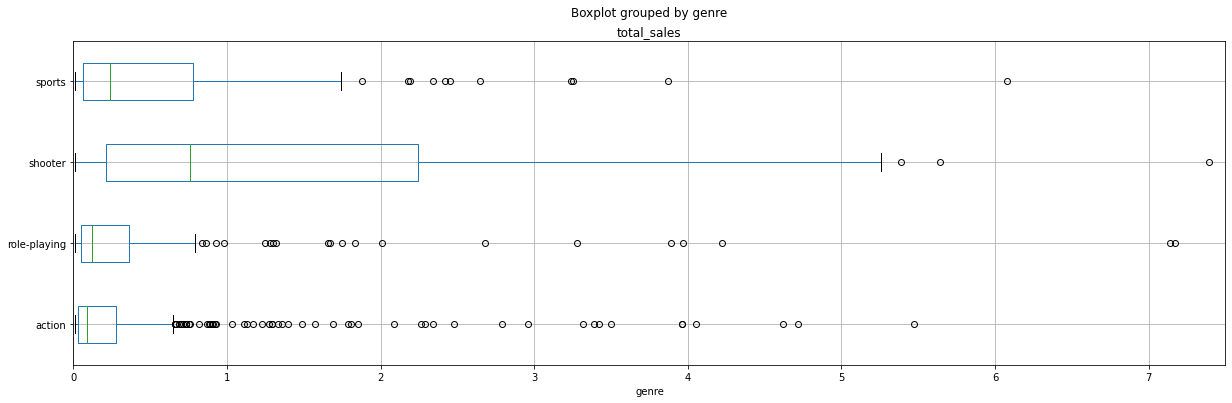

In [33]:

actual_sales_genres = actual_sales_genres[actual_sales_genres['sum'] > 30.0] #отобрали самые прибыльные жанры
#display(actual_sales_genres)

genres_actual_sales = data_actual[data_actual['genre'].isin(actual_sales_genres.index)]
                        
genres_actual_sales.boxplot('total_sales', by='genre', vert = False, figsize=(20, 6))
plt.xlim(0,7.5);

genres_actual_sales.loc[genres_actual_sales['genre'] == i]

for j in actual_sales_genres.index:
    review(genres_actual_sales[genres_actual_sales['genre'] == j], 'total_sales', j)
    print()

**Вывод** 
1. Самые прибыльные жанры (практически в 2 раза выше, чем ближайшие конкуренты) с примерно одинаковым уровнем продаж и с огромным отрывом по популярности , это жанры `shooter` и `action`. Однако медиана `shooter`  - 1.28, в то время как медиана `action` всего 0.11 - на уровне малоприбыльных жанров. Это значит, что высокую прибыль этому жанру в целом дают только отдельные игры.
2. Ближайшие к лиредам - `role_playing` и `sports`. `role_playing` с медианой 0.11, также как и жанр `action` имеет большую выручку при низкой медиане, которая обсуловлено отдельными "особыми" играми жанра. Игры жанра `sports` приносят более стабильный средний чек - 0.31

## Портрет пользователя по регионам продаж

### Предпочтения в платформах

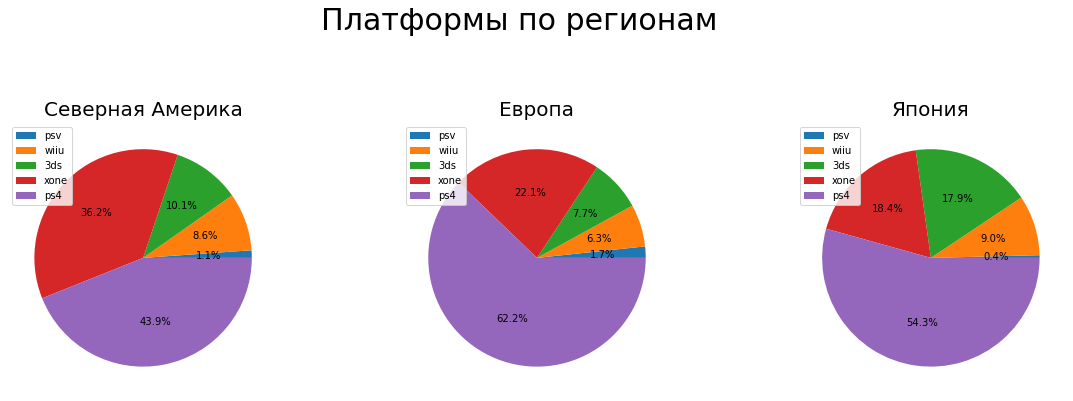

In [34]:
actual_sales_na = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='platform', 
                                        values=['na_sales'], 
                                        aggfunc='sum')
actual_sales_na = actual_sales_na.apply('sum', axis=0).sort_values().reset_index(level=0, drop=True)


actual_sales_eu = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='platform', 
                                        values=['eu_sales'], 
                                        aggfunc='sum')

actual_sales_eu = actual_sales_eu.apply('sum', axis=0).sort_values().reset_index(level=0, drop=True)

actual_sales_jp = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='platform', 
                                        values=['jp_sales'], 
                                        aggfunc='sum')

actual_sales_jp = actual_sales_jp.apply('sum', axis=0).sort_values().reset_index(level=0, drop=True)


'''Строим 3 круговых графика вместе'''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Платформы по регионам',
             y = 1.2,
             fontsize = 30)

ax1.pie(actual_sales_na, autopct='%1.1f%%')
ax1.set_title('Северная Америка', fontsize = 20)
#labels = ["psv", "wiiu", "3ds", "xone", "ps4"]
labels = [i for i in actual_sales_na.index ]
ax1.legend(labels, loc="upper left")

ax2.pie(actual_sales_eu, autopct='%1.1f%%')
ax2.set_title('Европа', fontsize = 20)
#labels = ["3ds", "ps4", "psv", "wiiu", "xone"]
labels = [i for i in actual_sales_na.index ]
ax2.legend(labels, loc="upper left")

ax3.pie(actual_sales_jp, autopct='%1.1f%%')
ax3.set_title('Япония', fontsize = 20)
#labels = ["xone", "ps4", "wiiu", "psv", "3ds"]
labels = [i for i in actual_sales_na.index ]
ax3.legend(labels, loc="upper left")

plt.show()


**Вывод:** 
Во всех регионах подавляющее число продаж приходится на `ps4`, на 2-м месте - `xone`, на третьем `3ds`. Для Америки доля `xone` выше - 36.2%, а для европы - `ps4` с 62.2%

### Предпочтения в жанрах

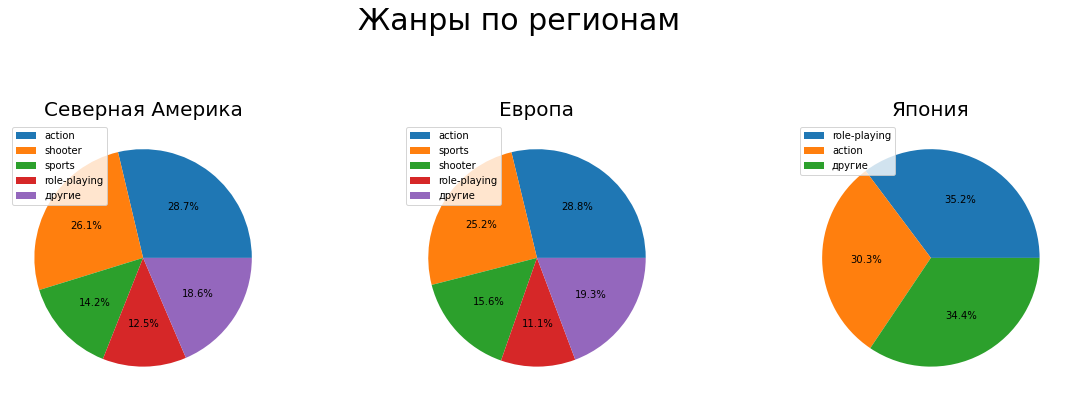

In [35]:
actual_sales_na = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='genre', 
                                        values=['na_sales'], 
                                        aggfunc='sum')

actual_sales_na = actual_sales_na.apply('sum', axis=0).sort_values(ascending=False)
actual_sales_na[actual_sales_na < 15] = actual_sales_na[actual_sales_na < 15].agg('sum')
actual_sales_na = actual_sales_na[:5].reset_index(level=0, drop=True)
df1 = pd.DataFrame({'genre': actual_sales_na.index, 'sales': actual_sales_na.values})
df1.loc[4, 'genre'] = 'другие'



actual_sales_eu = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='genre', 
                                        values=['eu_sales'], 
                                        aggfunc='sum')

actual_sales_eu = actual_sales_eu.apply('sum', axis=0).sort_values(ascending=False)
actual_sales_eu[actual_sales_eu < 15] = actual_sales_eu[actual_sales_eu < 15].agg('sum')
actual_sales_eu = actual_sales_eu[:5].reset_index(level=0, drop=True)
df2 = pd.DataFrame({'genre': actual_sales_eu.index, 'sales': actual_sales_eu.values})
df2.loc[4, 'genre'] = 'другие'



actual_sales_jp = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='genre', 
                                        values=['jp_sales'], 
                                        aggfunc='sum')

actual_sales_jp = actual_sales_jp.apply('sum', axis=0).sort_values(ascending=False)
actual_sales_jp[actual_sales_jp < 15] = actual_sales_jp[actual_sales_jp < 15].agg('sum')
actual_sales_jp = actual_sales_jp[:3].reset_index(level=0, drop=True)
df3 = pd.DataFrame({'genre': actual_sales_jp.index, 'sales': actual_sales_jp.values})
df3.loc[2, 'genre'] = 'другие'


'''Строим 3 круговых графика вместе'''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Жанры по регионам',
             y = 1.2,
             fontsize = 30)

ax1.pie(df1['sales'], autopct='%1.1f%%')
ax1.set_title('Северная Америка', fontsize = 20)
labels = ["action", "shooter", "sports", "role-playing", "другие"]
ax1.legend(labels, loc="upper left")

ax2.pie(df2['sales'], autopct='%1.1f%%')
ax2.set_title('Европа', fontsize = 20)
labels = ["action", "sports", "shooter", "role-playing", "другие"]
ax2.legend(labels, loc="upper left")

ax3.pie(df3['sales'], autopct='%1.1f%%')
ax3.set_title('Япония', fontsize = 20)
labels = ["role-playing", "action", "другие"]
ax3.legend(labels, loc="upper left")

plt.show()

**Вывод:** Различия по жанрам:
1. Рынки Северной Америки и Европы практически не различаются по жанровым предпочтениям:80% продаж обеспечиваются жанрами `action`, `shooter`, `sports`, `role_playing`. `action` и `shooter` занимают лидирующие позиции.
    Сказывается общность культуры этих двух регионов.
2. Рынок японии значительно отличается: здесь лидирующие позиции занимает `role-playing` с 35.5% и `action` с 28.3% рынка

### Предпочтения в рейтингах

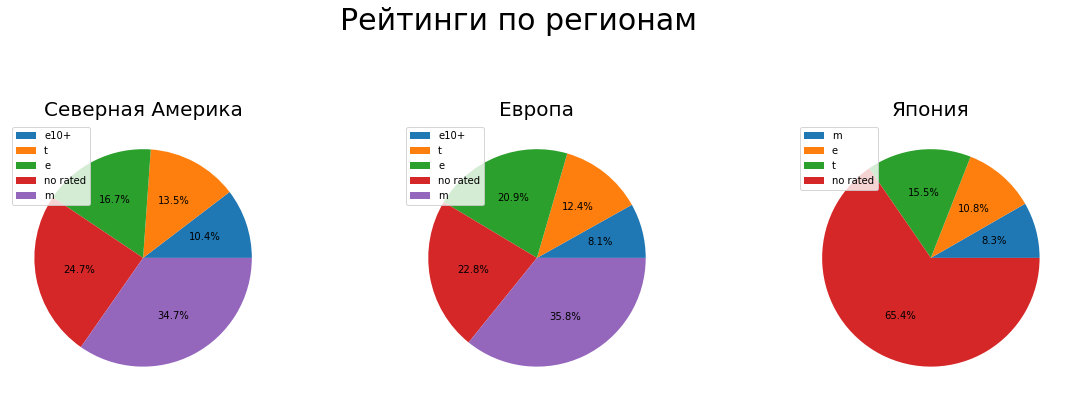

In [36]:
actual_sales_na = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='rating', 
                                        values=['na_sales'], 
                                        aggfunc='sum')
actual_sales_na = actual_sales_na.apply('sum', axis=0).sort_values().reset_index(level=0, drop=True)
actual_sales_na = actual_sales_na[actual_sales_na > 5]


actual_sales_eu = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='rating', 
                                        values=['eu_sales'], 
                                        aggfunc='sum')

actual_sales_eu = actual_sales_eu.apply('sum', axis=0).sort_values().reset_index(level=0, drop=True)
actual_sales_eu = actual_sales_eu[actual_sales_eu > 5]

actual_sales_jp = data_actual.pivot_table(
                                        index='year_of_release', 
                                        columns='rating', 
                                        values=['jp_sales'], 
                                        aggfunc='sum')

actual_sales_jp = actual_sales_jp.apply('sum', axis=0).sort_values().reset_index(level=0, drop=True)
actual_sales_jp = actual_sales_jp[actual_sales_jp > 5]

'''Строим 3 круговых графика вместе'''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Рейтинги по регионам',
             y = 1.2,
             fontsize = 30)

ax1.pie(actual_sales_na, autopct='%1.1f%%')
ax1.set_title('Северная Америка', fontsize = 20)
#labels = ["psv", "wiiu", "3ds", "xone", "ps4"]
labels = [i for i in actual_sales_na.index ] 
ax1.legend(labels, loc="upper left")

ax2.pie(actual_sales_eu, autopct='%1.1f%%')
ax2.set_title('Европа', fontsize = 20)
#labels = ["3ds", "ps4", "psv", "wiiu", "xone"]
labels = [i for i in actual_sales_eu.index ]
ax2.legend(labels, loc="upper left")

ax3.pie(actual_sales_jp, autopct='%1.1f%%')
ax3.set_title('Япония', fontsize = 20)
#labels = ["xone", "ps4", "wiiu", "psv", "3ds"]
labels = [i for i in actual_sales_jp.index ]
ax3.legend(labels, loc="upper left")

plt.show()

**Вывод:** 
1. На рынках Северной Америки и Европы предпочтения по рейтингам практически одинаковые:
    * Приблизительно четверть продаж (25%) приходится на игры, нерейтингованые ESRB. На рынке Северной Америки происходят продажи игр без ESRB не взирая на запрет. Низкая доля таких продаж говорит о том, что пользователям важно наличие этой отметки.
    * Приблизительно треть продаж (34.5%, 36.4%) приходся на игры с рейтингом М "для подростков старше 17 лет", включающие откровенные сцены насилия. 
    * Приблизительно четверть (16.5% / 19.6%) продаж приходится на игры рейтинга E - everyone.
2. На рынке Японии предпочтения по рейтингам заметны значительные отклонения от рынков Северной Америки и Европы:
    * 62.6% общего объема продаж этого рынка приходтся на игры без рейтинга ESRB. Возможно это так потому, что в Японии действует своя рейтинговая организация CERO.
    * 16.4% продаж занимают игры с рейтингом T - для подростков от 13 лет
    * 12.3% - Е
    * 8.7% - М

## Проверка гипотез

### Средние пользовательские рейтинги платформ `xone` и `pc` одинаковые

```
H_0: Средние пользовательские рейтинги платформы `xone` = Средние пользовательские рейтинги платформы `pc`
H_a: Средние пользовательские рейтинги платформы `xone` ≠ Средние пользовательские рейтинги платформы `pc`
```

In [37]:
data_all_platforms_actual = data.query(' 2013 <year_of_release <= 2016') #отббор актуальных дат выпуска для прогноза на 17 год

In [38]:
xone_platform = data_all_platforms_actual.query('platform == "xone"')
pc_platform = data_all_platforms_actual.query('platform == "pc"')
result = st.ttest_ind(xone_platform['user_score'], pc_platform['user_score'], equal_var=False)

alpha = 0.1
print(result.pvalue)
if result.pvalue < alpha:
    print('Нулевая гипотеза была отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.05074432986520523
Нулевая гипотеза была отвергнута


**Вывод:** 
На примере `xone` и `pc`: средние оценки пользователей на разных платформах отличаются 

### Средние пользовательские рейтинги жанров `action` и `sports` разные

```
H_0: Средние пользовательские рейтинги жанра `action` = Средние пользовательские рейтинги жанра `sports`
H_a: Средние пользовательские рейтинги жанра `action` ≠ Средние пользовательские рейтинги жанра `sports`
```

In [39]:
action_genre = data_all_platforms_actual.query('genre == "action"')
sports_genre = data_all_platforms_actual.query('genre == "sports"')
result = st.ttest_ind(action_genre['user_score'], sports_genre['user_score'], equal_var=False)

alpha = 0.1
print(result.pvalue)
if result.pvalue < alpha:
    print('Нулевая гипотеза была отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

7.412789238344041e-17
Нулевая гипотеза была отвергнута


In [40]:
data_xone = data_all_platforms_actual.query('platform == "xone"')

action_genre = data_xone.query('genre == "action"')
sports_genre = data_xone.query('genre == "sports"')
result = st.ttest_ind(action_genre['user_score'], sports_genre['user_score'], equal_var=False)

alpha = 0.1
print(result.pvalue)
if result.pvalue < alpha:
    print('Нулевая гипотеза была отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

9.363603146428872e-05
Нулевая гипотеза была отвергнута


**Вывод:** 
Средние рейтинги пользователей разные между жанрами как по всем платформам, как и при сравнении на одной конкретной платформе (к пример, `xone`).

## ИТОГОВЫЙ ВЫВОД

Целью выполненного исследования было выявить определяющие успешность игры закономерности. 

Итоги исследования датасета:
1. Определены 5 наиболее прибыльных в мире платформ в 2014-2015 годах: `xone`, `ps4`, `wiiu`, `psv`, `3ds`. Среди данных приставок по объемам продаж замметно выделяются `ps4`, `xone`. `wiiu` при меньших объемах имеет хороший средний чек, на этой платформе меньше игр при стабильно хорошей продаваемости. У этих трех платформ медиана по выручке от средней игры ~ 0.2
2. Отзывы критиков не играют решающей роли в увеличении спроса на игры, но определенно способствует увеличению показателей продаж на платформах `ps4`, `wii`, `xone`.
3. Отзывы клиентов не имеют линейной взаимосвязи с объемом продаж игры, за исключением платформы `wii`. Коэффициент корреляции пирсона для нее составляет 0.33.
4. Самые прибыльные жанры - это `shooter` и `action`. Игры жанра `shooter` стабильно приносят больший "чек" (медиана по играм - 1.28). Игры жанра `shooter` при соразмерном объеме продаж имеют медиану всего 0.11, что означает, что большая часть выручки обеспечена только отдельными играми этого жанра. Также внимание возможно уделить на жанры `role_playing` и `sports`: `role_playing` с медианой 0.11, также как и жанр `action` имеет большую выручку при низкой медиане, которая обсуловлено отдельными "особыми" играми жанра; игры жанра `sports` при схожей выручке приносят более высокий средний чек - 0.31./
5. В каждом из 3 важнейших регионов - Америки, Европы, Японии - в топ-3 находятся одни и те же платформы: `ps4`, `xone`, `3ds`.
6. При планировании рекламной компании дл рынка Америки и Европы требуется делать на жанры `shooter` и `action`. Однако для рынка Японии `shooter` заменяет собой жанр `role-playing`.
7. Для рынка Америки/Европы и Японии привлекательность несут разные возрастные рейтинги игр. Для Америки/Европы чуть больше трети продаж приходится на игры с рейтингом `M` (17+), 25% - `Е`, примерно десятая часть - на `T`. При планировании маркетинговой компании для рынка Японии не стоит опираться на рейтинги органинизации ESRB, т.к. 62.6% объема продаж приходится на игры, не отрейтингованные ESRB. Можно выделить катигорию `T`(для подростков 13-16) как самую всотребованную с ESRB : 16.4%.
8. Средние пользовательские оценки на разных платформах отличаются, также как и пользовательские оценки по жанрам (как на одной, так и вобщем по платформам).